In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df= pd.read_excel("/content/airbnb_listings.xlsx")

In [71]:
#df.head(5)

In [72]:
print("*Column Names:*")
print(df.columns)
print("-----------------------------------------------------------------")
print("First 5 rows of the data")
print(df.head(5))
print("-----------------------------------------------------------------")
print("Null values ie one marked with NaN")
print(df.isnull().sum())
print("-----------------------------------------------------------------")


*Column Names:*
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
-----------------------------------------------------------------
First 5 rows of the data
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaT     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaT     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaT                Sunny Room in Harlem      Manhattan   
3       500 2008-06-26  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500 2008-06-26            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment 

In [73]:
print(df.isnull().sum())

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64


Missing values in categorical cols

In [74]:
categorical_cols = df.select_dtypes(include=['object', 'category'])


missing_categorical = categorical_cols.isnull().sum()


missing_categorical = missing_categorical[missing_categorical > 0]


print("Missing values in categorical columns:")
print(missing_categorical)


Missing values in categorical columns:
Property Type    3
dtype: int64


In [75]:
df.describe()

,Host Id,Host Since,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,30475,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.273171e+07,2013-06-29 17:56:15.317473280,90.738659,10584.854831,1.530089,1.0,12.018735,163.589737,91.993230
min,5.000000e+02,2008-06-26 00:00:00,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.701298e+06,2012-06-21 00:00:00,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551693e+06,2013-09-01 00:00:00,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.120617e+07,2014-09-12 00:00:00,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,2015-08-31 00:00:00,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000
std,1.190270e+07,NaN,9.059519,921.299397,1.015359,0.0,21.980703,197.785454,8.850373


In [76]:
missingrows=(df[df.isnull().any(axis=1)])
missingrows

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
13,2787,2008-09-07,Renovated and spacious townhome,Brooklyn,House,NaN,Private room,11223.0,1.0,1,0,68,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,2015-08-31,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,2015-08-31,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,2015-08-31,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,2015-08-31,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


In [77]:
df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,2015-08-31,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,2015-08-31,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,2015-08-31,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,2015-08-31,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


****Data Cleaning****



Removing spaces from col names

In [78]:

df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()


Removing missing values from numerical cols

In [79]:
missingpercentage = df.isnull().mean() * 100

print("Missing Percentage per Column:")
print(missingpercentage.sort_values(ascending=False))


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Identify columns with missing percentage > 30
dropcols = missingpercentage[numeric_cols][missingpercentage[numeric_cols] > 30].index

# Show columns that will be dropped
print("\nColumns to drop (missing % > 30):")
print(dropcols.tolist())

# Drop
df.drop(columns=dropcols, inplace=True)

print("\nRemaining columns after drop:")
print(df.columns.tolist())


Missing Percentage per Column:
review_scores_rating_(bin)    27.308222
review_scores_rating          27.308222
zipcode                        0.439661
beds                           0.278890
host_since                     0.009843
property_type                  0.009843
neighbourhood                  0.000000
host_id                        0.000000
name                           0.000000
room_type                      0.000000
number_of_records              0.000000
number_of_reviews              0.000000
price                          0.000000
dtype: float64

Columns to drop (missing % > 30):
[]

Remaining columns after drop:
['host_id', 'host_since', 'name', 'neighbourhood', 'property_type', 'review_scores_rating_(bin)', 'room_type', 'zipcode', 'beds', 'number_of_records', 'number_of_reviews', 'price', 'review_scores_rating']


In [80]:
#printing categorical coloumns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['name', 'neighbourhood', 'property_type', 'room_type'], dtype='object')


In [81]:
# Calculate missing percentage
missing_cat_percentage = df[categorical_cols].isnull().mean() * 100
missing_cat_percentage = missing_cat_percentage[missing_cat_percentage > 0]

#Drop categorical columns with >30% missing
drop_cat_cols = missing_cat_percentage[missing_cat_percentage > 30].index
df.drop(columns=drop_cat_cols, inplace=True)

# columns with mode
fill_cat_cols = missing_cat_percentage[missing_cat_percentage <= 30].index
for col in fill_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


print("Dropped categorical columns with >30% missing:")
print(drop_cat_cols.tolist())

print("\nFilled categorical columns with <=30% missing using mode:")
print(fill_cat_cols.tolist())

Dropped categorical columns with >30% missing:
[]

Filled categorical columns with <=30% missing using mode:
['property_type']


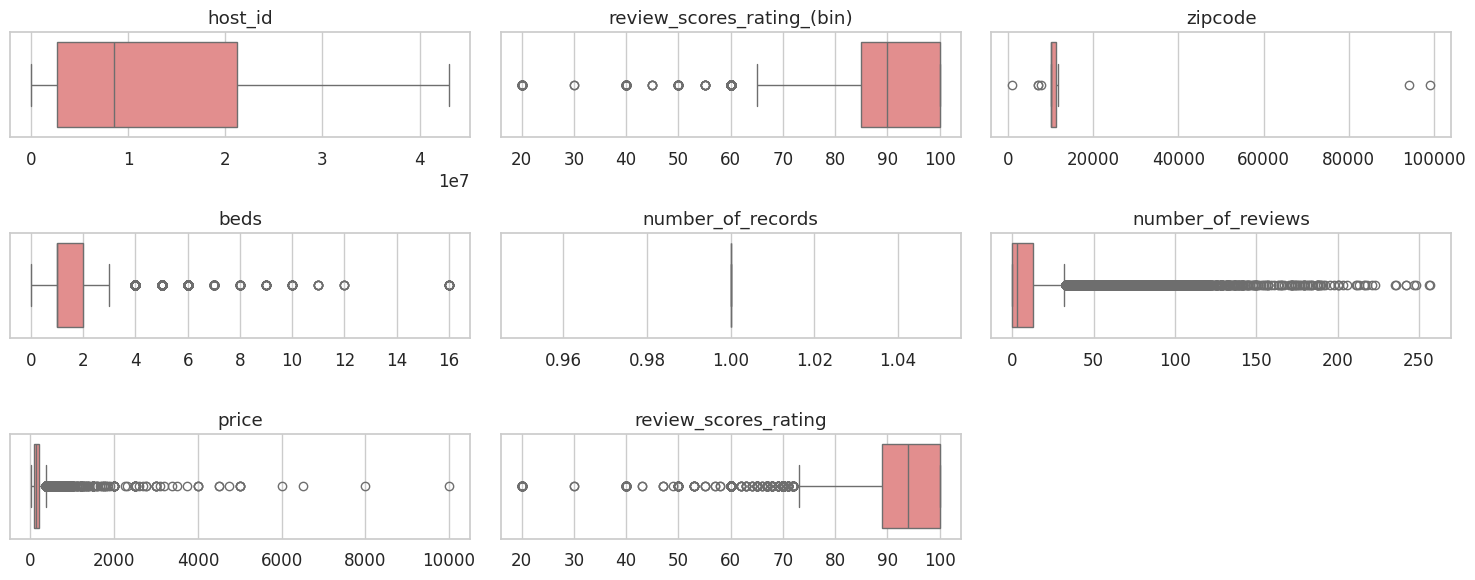

In [82]:

import math


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

# subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2))
axes = axes.flatten()


for i, column in enumerate(numeric_cols):
    sns.boxplot(x=df[column], ax=axes[i], color='lightcoral')
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Hide any empty subplots if columns < grid size
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.savefig('boxplots.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


 Boxplots after fixing outliers:



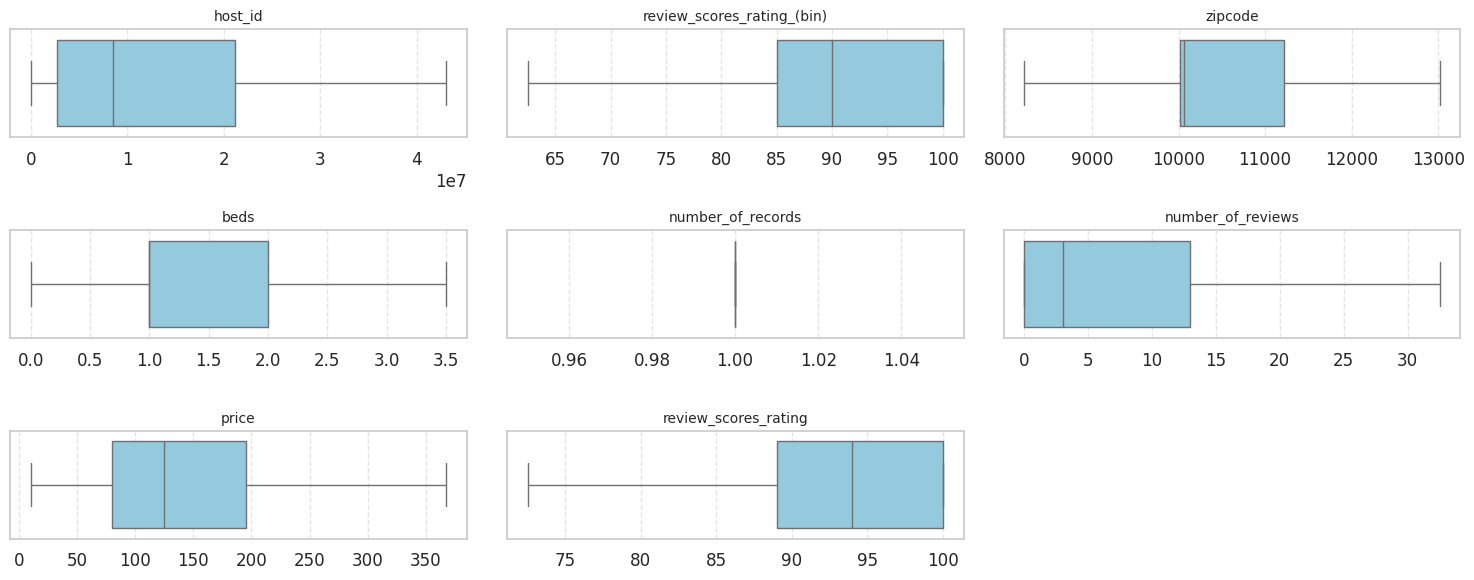

In [83]:
import math


for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

print(" Boxplots after fixing outliers:\n")


n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2))
axes = axes.flatten()


for i, column in enumerate(numeric_cols):
    sns.boxplot(x=df[column], ax=axes[i], color='skyblue')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].grid(True, axis='x', linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


****Exploratory Data Analysis****



In [84]:

sns.set(style="whitegrid", palette="pastel", font_scale=1.1)


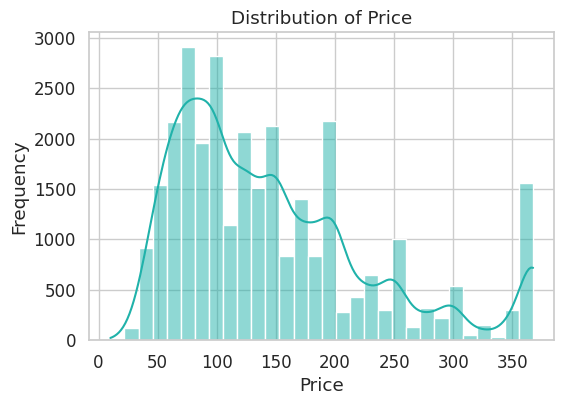

In [85]:


plt.figure(figsize=(6,4))
sns.histplot(x='price', data=df,color="lightseagreen", kde=True, bins=30)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-3007504238.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




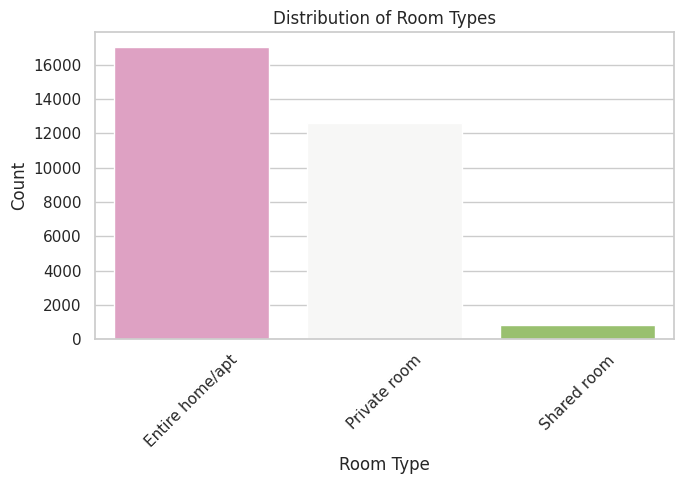

In [121]:

plt.figure(figsize=(7,5))
sns.countplot(x='room_type', data=df, palette='PiYG')

plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


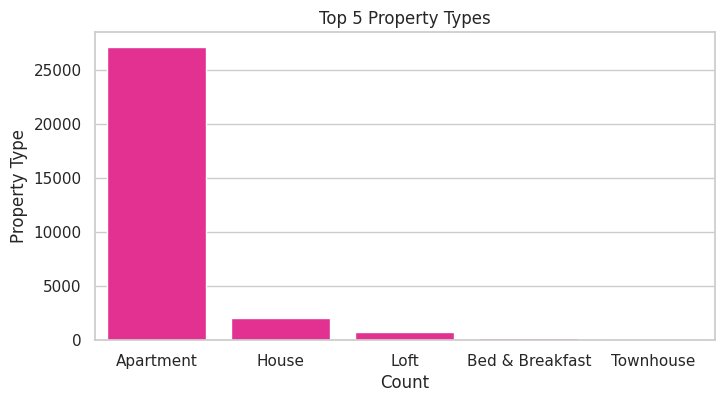

In [119]:

plt.figure(figsize=(8,4))
sns.countplot(x='property_type', data=df,color= "deeppink" ,order=df['property_type'].value_counts().index[:5])
plt.title('Top 5 Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()


In [88]:
print(df.columns)


Index(['host_id', 'host_since', 'name', 'neighbourhood', 'property_type',
       'review_scores_rating_(bin)', 'room_type', 'zipcode', 'beds',
       'number_of_records', 'number_of_reviews', 'price',
       'review_scores_rating'],
      dtype='object')


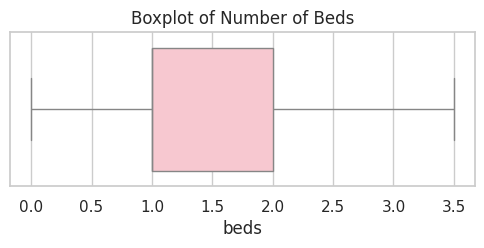

In [126]:


# boxplot
plt.figure(figsize=(6,2))
sns.boxplot(x='beds', data=df, color="pink")
plt.title('Boxplot of Number of Beds')
plt.show()



   Neighbourhood   
neighbourhood
Manhattan        52.605158
Brooklyn         38.306319
Queens            7.474244
Bronx             1.131964
Staten Island     0.482315
Name: proportion, dtype: float64


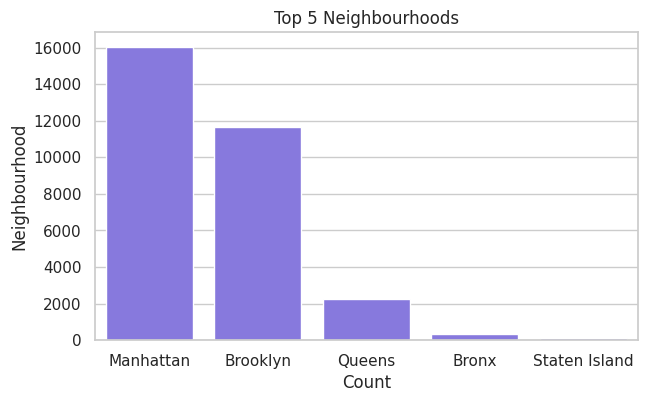

In [124]:
#freq table
print("\n   Neighbourhood   ")
print(df['neighbourhood'].value_counts(normalize=True).head(5) * 100)

plt.figure(figsize=(7,4))
sns.countplot(x='neighbourhood', data=df,color="mediumslateblue", order=df['neighbourhood'].value_counts().index[:5])
plt.title('Top 5 Neighbourhoods')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()



   Review Scores Rating   
count    22155.000000
mean        92.381855
std          7.277786
min         72.500000
25%         89.000000
50%         94.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64
Missing values: 27.31%


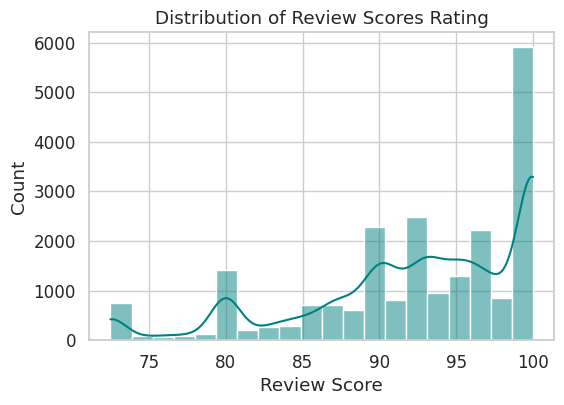

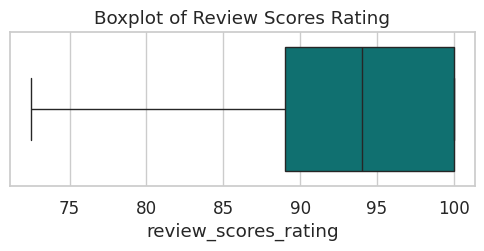

In [91]:
print("\n   Review Scores Rating   ")
print(df['review_scores_rating'].describe())


missing = df['review_scores_rating'].isnull().mean() * 100
print(f"Missing values: {missing:.2f}%")

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['review_scores_rating'], bins=20, kde=True, color='teal')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# Boxplot
plt.figure(figsize=(6,2))
sns.boxplot(x='review_scores_rating', data=df, color='teal')
plt.title('Boxplot of Review Scores Rating')
plt.show()


In [92]:
summary = pd.DataFrame({
    'Column': ['property_type', 'neighbourhood', 'no_of_beds', 'review_scores_rating'],
    'DataType': [df['property_type'].dtype, df['neighbourhood'].dtype, df['beds'].dtype, df['review_scores_rating'].dtype],
    'Missing%': [df[c].isnull().mean()*100 for c in ['property_type','neighbourhood','beds','review_scores_rating']],
    'Unique Values': [df[c].nunique() for c in ['property_type','neighbourhood','beds','review_scores_rating']]
})
print(summary)


                 Column DataType   Missing%  Unique Values
0         property_type   object   0.000000             19
1         neighbourhood   object   0.000000              5
2            no_of_beds  float64   0.278890              5
3  review_scores_rating  float64  27.308222             29


****Bivariate Analysis****

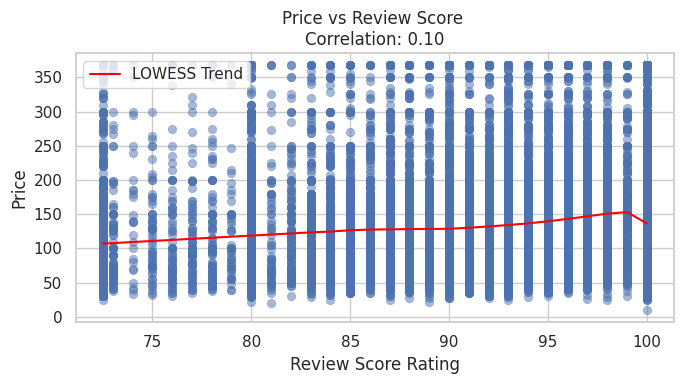

In [133]:
from statsmodels.nonparametric.smoothers_lowess import lowess


price_threshold = df['price'].quantile(0.99)
filtered_df = df[df['price'] <= price_threshold]

# scatter plot with LOWESS trend line
plt.figure(figsize=(7, 4))
sns.scatterplot(
    data=filtered_df,
    x='review_scores_rating',
    y='price',
    alpha=0.5,
    edgecolor=None
)


lowess_smoothed = lowess(filtered_df['price'], filtered_df['review_scores_rating'], frac=0.3)
plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='red', label='LOWESS Trend')


correlation = filtered_df['price'].corr(filtered_df['review_scores_rating'])
plt.title(f"Price vs Review Score \nCorrelation: {correlation:.2f}")
plt.xlabel("Review Score Rating")
plt.ylabel("Price")
plt.legend()

plt.tight_layout()
plt.show()


/tmp/ipython-input-2474684859.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




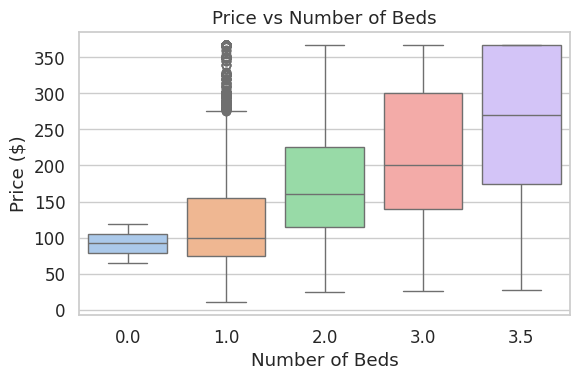

In [95]:


plt.figure(figsize=(6, 4))
sns.boxplot(x='beds', y='price', data=df, palette='pastel')

plt.title("Price vs Number of Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


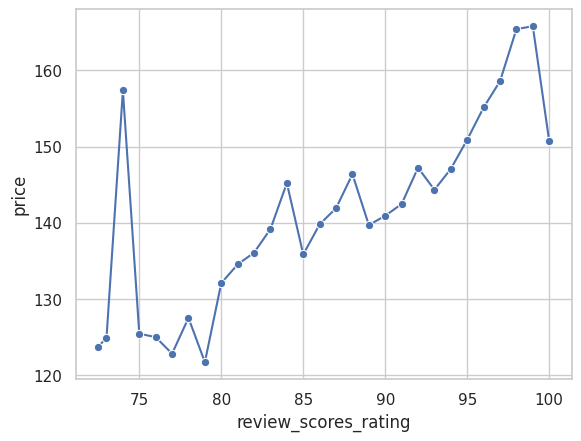

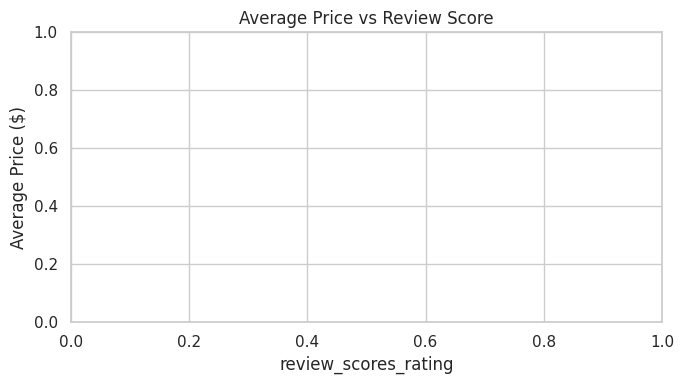

In [128]:

avg_price = df.groupby('review_scores_rating')['price'].mean().reset_index()
sns.lineplot(x='review_scores_rating', y='price', data=avg_price, marker='o')

plt.figure(figsize=(7, 4))
plt.title("Average Price vs Review Score")
plt.xlabel("review_scores_rating")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2778721737.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




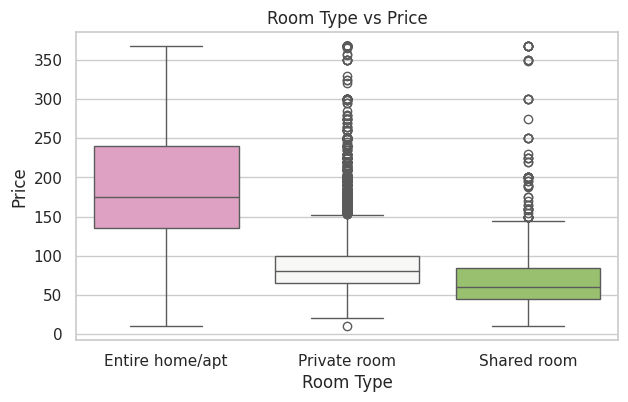

In [136]:


#  Boxplot
plt.figure(figsize=(7,4))
sns.boxplot(x='room_type', y='price', data=df, palette='PiYG')
plt.title('Room Type vs Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()



/tmp/ipython-input-2190130110.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-2190130110.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




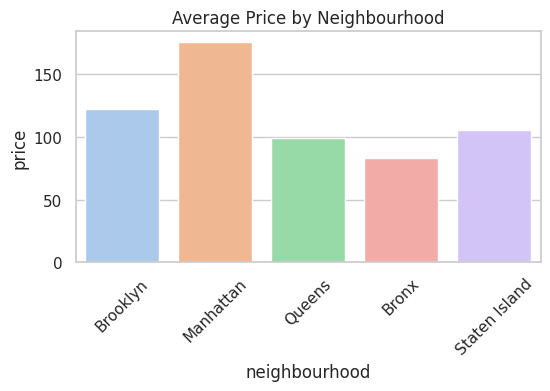

In [131]:
plt.figure(figsize=(6, 3))
sns.barplot(x='neighbourhood', y='price', data=df,palette='pastel', estimator='mean', ci=None)
plt.xticks(rotation=90)
plt.title('Average Price by Neighbourhood')
plt.xticks(rotation=45)
plt.show()


*Pair-wise correlation*

numerical cols only

In [100]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


corr_matrix = numeric_df.corr(method='pearson')
print("\nPairwise Correlation Matrix:\n")
print(corr_matrix)



Pairwise Correlation Matrix:

                             host_id  review_scores_rating_(bin)   zipcode  \
host_id                     1.000000                   -0.017627 -0.023968   
review_scores_rating_(bin) -0.017627                    1.000000  0.026654   
zipcode                    -0.023968                    0.026654  1.000000   
beds                       -0.007389                   -0.092188  0.012519   
number_of_records                NaN                         NaN       NaN   
number_of_reviews          -0.308905                   -0.121710 -0.028326   
price                      -0.079131                    0.091404 -0.328440   
review_scores_rating       -0.035435                    0.977714  0.028170   

                                beds  number_of_records  number_of_reviews  \
host_id                    -0.007389                NaN          -0.308905   
review_scores_rating_(bin) -0.092188                NaN          -0.121710   
zipcode                     0.01

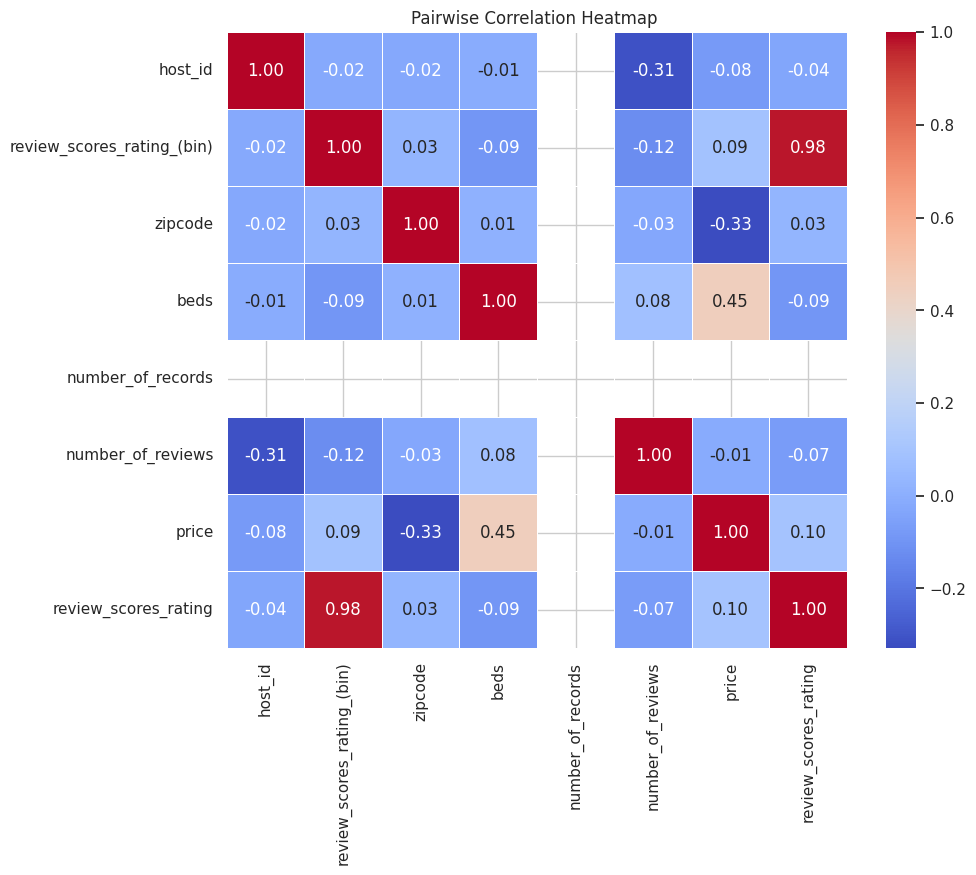

In [132]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pairwise Correlation Heatmap ')
plt.savefig('pairwise_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


-- Average Number of Reviews by Neighbourhood ---

/tmp/ipython-input-3642635192.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




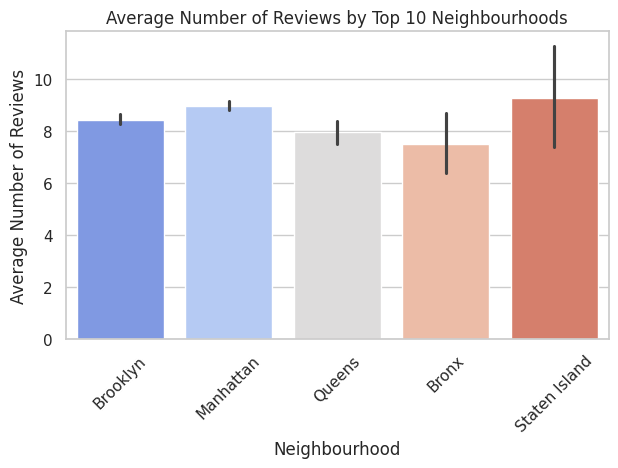

In [137]:
# Barplot
plt.figure(figsize=(7,4))
sns.barplot(x='neighbourhood', y='number_of_reviews', data=subset, estimator='mean', palette='coolwarm')
plt.title('Average Number of Reviews by Top 10 Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45)
plt.show()



/tmp/ipython-input-978233098.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




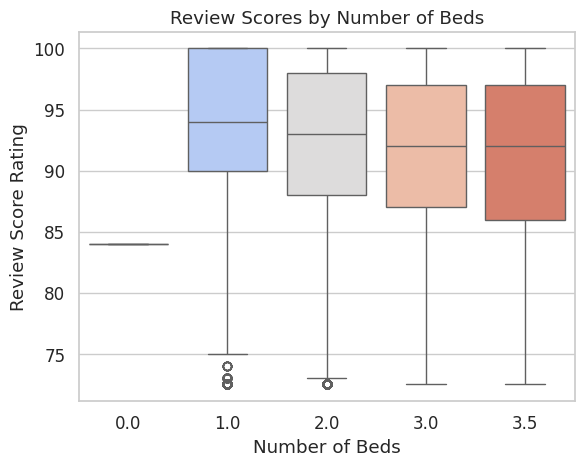

In [104]:
sns.boxplot(x='beds', y='review_scores_rating', data=df, palette='coolwarm')
plt.title('Review Scores by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Review Score Rating')
plt.show()


***Multivariate***

In [140]:
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px


df['rating_category'] = pd.qcut( df['review_scores_rating'], q=3, labels=['Low', 'Medium', 'High']
)

# numeric on;ly
features = ['price', 'beds', 'number_of_reviews', 'review_scores_rating']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# category colors
color_map = {'Low': 0, 'Medium': 1, 'High': 2}
df_scaled['rating_code'] = df_scaled['rating_category'].map(color_map)


df_sample = df_scaled.sample(n=min(200, len(df_scaled)), random_state=42)
plt.figure(figsize=(5,3))

fig = px.parallel_coordinates(
    df_sample,
    dimensions=features,
    color='rating_code',
    color_continuous_scale=['#FFD700', '#00BFFF', '#6A0DAD'],
    title="Parallel Coordinates Plot Multivariate Comparison by Rating Category"
)


fig.update_layout(
    title_font_size=16,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=12)
)

fig.show()


<Figure size 500x300 with 0 Axes>

In [108]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go



features = ['price', 'beds', 'number_of_reviews', 'review_scores_rating']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])


grouped = df_scaled.groupby('rating_category')[features].mean().reset_index()


categories = features

fig = go.Figure()

for i, row in grouped.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[features].values,
        theta=categories,
        fill='toself',
        name=row['rating_category']
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="Glyph Chart - Multivariate Comparison by Rating Category",
    showlegend=True
)

fig.show()


/tmp/ipython-input-495335987.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



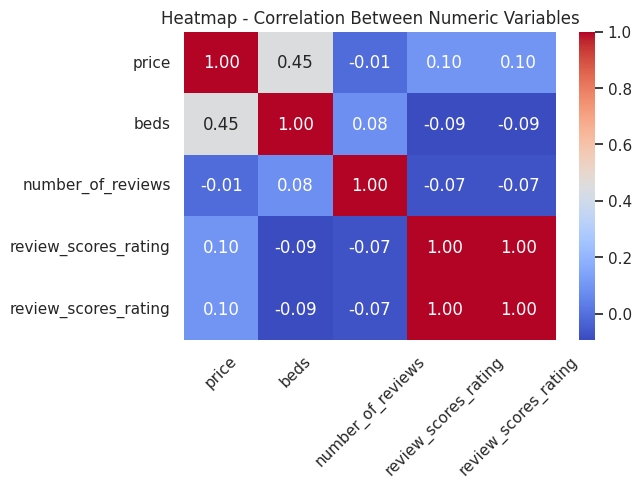

In [144]:

corr = df[features + ['review_scores_rating']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap - Correlation Between Numeric Variables")
plt.savefig('numeric_variables_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-928687298.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



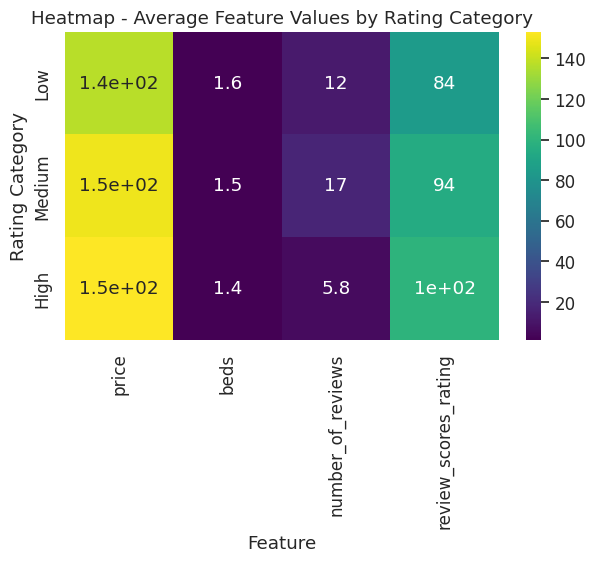

In [110]:
group_means = df.groupby('rating_category')[features].mean()


plt.figure(figsize=(7,4))
sns.heatmap(group_means, annot=True, cmap='viridis')
plt.title("Heatmap - Average Feature Values by Rating Category")
plt.xlabel("Feature")
plt.ylabel("Rating Category")
plt.show()


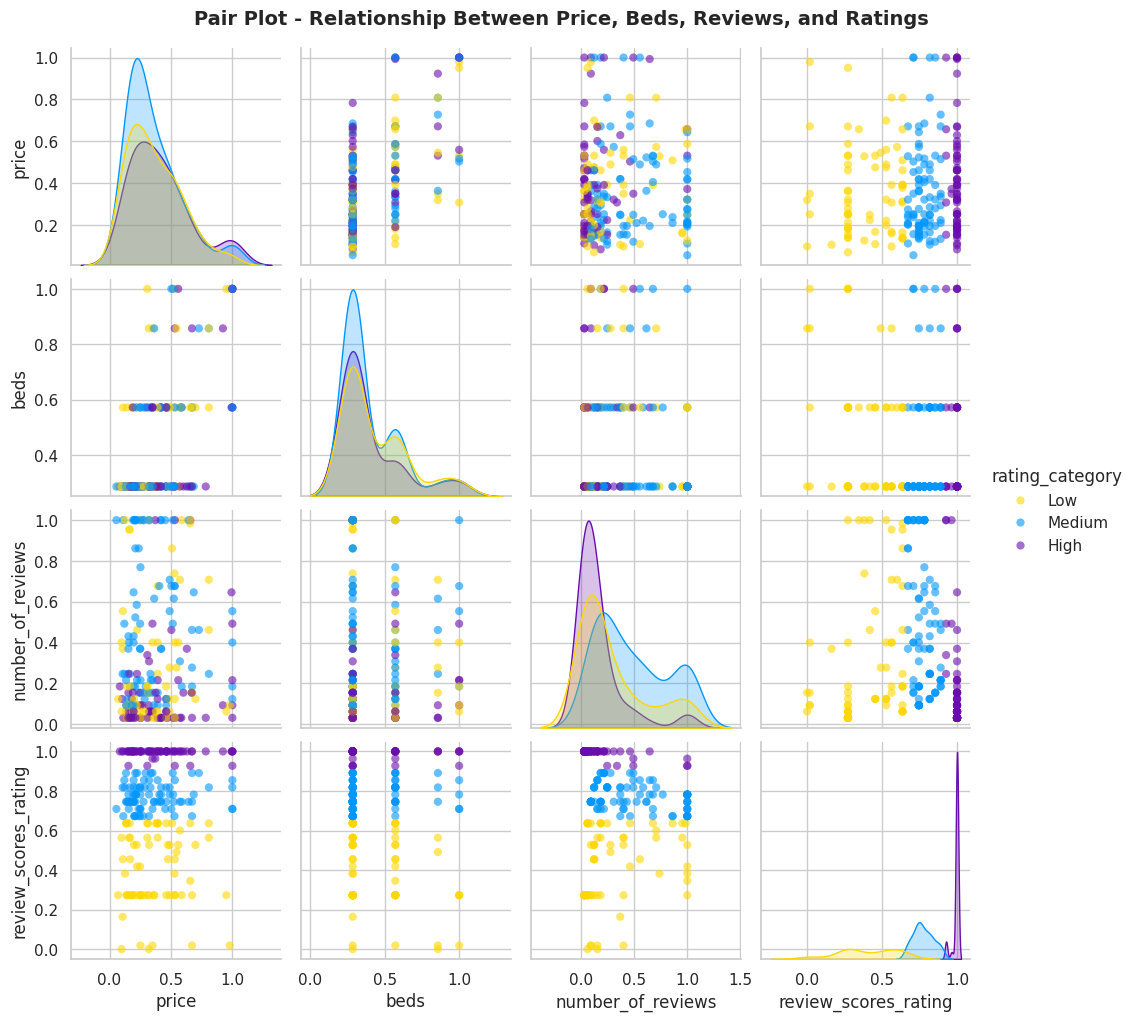

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


features = ['price', 'beds', 'number_of_reviews', 'review_scores_rating']


scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])


df_sample = df_scaled.sample(n=300, random_state=42)


sns.set_theme(style="whitegrid")


pair = sns.pairplot(
    df_sample,
    vars=features,
    hue='rating_category',
    palette={'High': '#6A0DAD', 'Medium': '#0096FF', 'Low': '#FFD700'},
    diag_kind='kde',                         # smooth density curves on diagonals
    plot_kws={'alpha': 0.6, 's': 35, 'edgecolor': 'none'}  # clean scatter style
)

# Add title and adjust layout
pair.fig.suptitle(
    "Pair Plot - Relationship Between Price, Beds, Reviews, and Ratings",
    y=1.02,
    fontsize=14,
    fontweight='bold'
)

pair.fig.savefig('pairplot.png', dpi=300, bbox_inches='tight')
plt.show()
